In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# reading the time series (pd.Series format)
series = pd.read_csv('./weather/weather.csv') 
tseries = series['t_out']
# you can simulate some data with:
# tseries = pd.Series(np.random.random(100))

# using 3 lags -- the no. of observation we look back to model the next value of the series
N_LAGS = 5
# Constructing a set of observations based on past recent values (lags)
tseries_df = pd.concat([tseries.shift(i) for i in range(N_LAGS, -1, -1)], axis=1)
# Assigning column names and dropping na's
tseries_df.columns = ['t-' + str(i) for i in list(reversed(range(N_LAGS)))] + ['t+1']
tseries_df = tseries_df.dropna().reset_index(drop=True)

# the target variable is the column 't+1' representing the next value of the series
y = tseries_df['t+1']
# Removing the target to create the predictor variables
X = tseries_df.drop('t+1', axis=1)

# basic train/test split -- you may want a more robust cross-validation approach
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

# setting the threshold to the 95th percentile
thr = 37

# transforming the numeric target to a binary one 
y_train_binary = (y_train >= thr).astype(int)
y_test_binary = (y_test >= thr).astype(int)

# training a probabilistic classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train_binary)

# predicting exceedance probability
exceedance_prob_clf = classifier.predict_proba(X_train)[:, 1]

Text(0, 0.5, '°C')

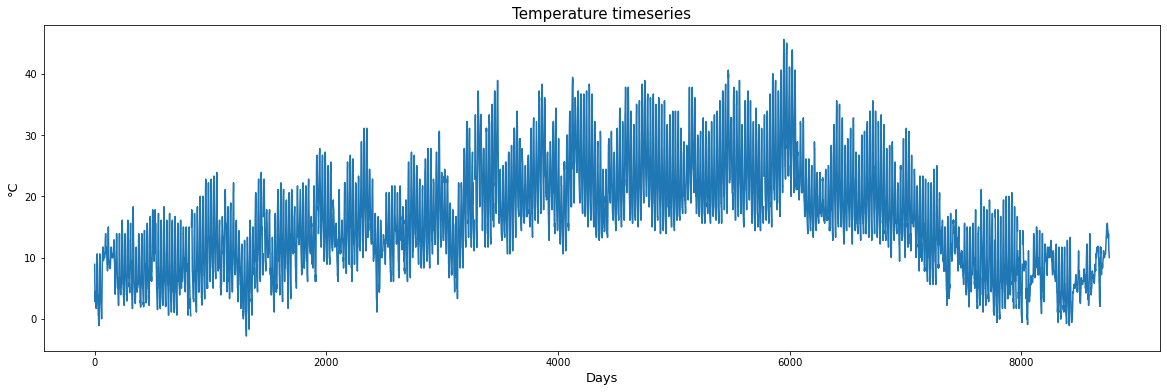

In [95]:
plt.figure(figsize=[20, 6])
plt.plot(tseries)
plt.title('Temperature timeseries', fontsize = 15)
plt.xlabel('Days', fontsize = 13)
plt.ylabel('°C', fontsize = 13)

In [96]:
# # Using the RF as ensemble of trees
# from sklearn.ensemble import RandomForestRegressor

# # Training the model
# forecasting_ensemble = RandomForestRegressor()
# # Here we use the numerical target
# ## which represents the next value of the time series
# forecasting_ensemble.fit(X_train, y_train)

# # Retrieving the predictions from the trees.
# per_tree_pred = [tree.predict(X_test) for tree in forecasting_ensemble.estimators_]
# per_tree_df = pd.DataFrame(per_tree_pred).T

# # Computing the ratio of trees which predict a value above the threshold
# exceedance_prob_fe = per_tree_df.apply(lambda x: np.mean(x > thr), axis=1).values

In [97]:

# from sklearn.metrics import brier_score_loss, roc_auc_score

# roc_auc_score(y_true=y_test_binary, y_score=exceedance_prob_fe)
# roc_auc_score(y_true=y_test_binary, y_score=exceedance_prob_clf)

# brier_score_loss(y_true=y_test_binary, y_prob=exceedance_prob_fe)
# brier_score_loss(y_true=y_test_binary, y_prob=exceedance_prob_clf)

Text(0, 0.5, 'Probability')

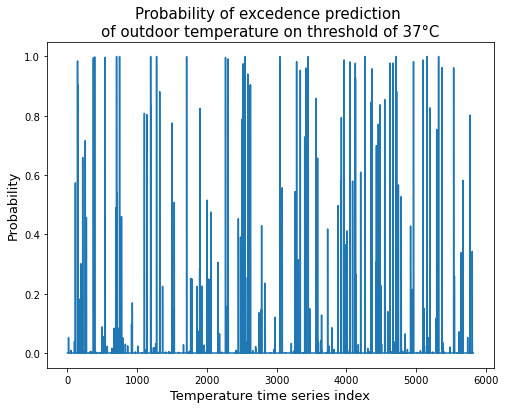

In [98]:
plt.figure(figsize=[8, 6])
plt.plot(exceedance_prob_clf)
plt.title("Probability of excedence prediction \nof outdoor temperature on threshold of {}°C".format(thr), fontsize = 15)
plt.xlabel("Temperature time series index", fontsize = 13)
plt.ylabel("Probability", fontsize = 13)